In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241213_143459.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241213_143459.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    55224  1.734097e+09  0.153116  0.024390  0.329513   
 1             0    55225  1.734097e+09  0.153104  0.024257  0.329534   
 2             0    55226  1.734097e+09  0.153067  0.024118  0.329480   
 3             0    55227  1.734097e+09  0.153024  0.023971  0.329448   
 4             0    55228  1.734097e+09  0.152978  0.023845  0.329424   
 ...         ...      ...           ...       ...       ...       ...   
 9650587   87922  8459207  1.734181e+09  0.017066 -0.189197  0.284303   
 9650588   87922  8459208  1.734181e+09  0.017166 -0.189313  0.284956   
 9650589   87922  8459209  1.734181e+09  0.017287 -0.189432  0.285600   
 9650590   87922  8459210  1.734181e+09  0.017433 -0.189531  0.286274   
 9650591   87922  8459211  1.734181e+09  0.017584 -0.189626  0.286921   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.004096 -0.009374  0.001572  1.956136e-08

In [4]:
df,csvs["stim"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    55224  1.734097e+09  0.153116  0.024390  0.329513   
 1             0    55225  1.734097e+09  0.153104  0.024257  0.329534   
 2             0    55226  1.734097e+09  0.153067  0.024118  0.329480   
 3             0    55227  1.734097e+09  0.153024  0.023971  0.329448   
 4             0    55228  1.734097e+09  0.152978  0.023845  0.329424   
 ...         ...      ...           ...       ...       ...       ...   
 9650587   87922  8459207  1.734181e+09  0.017066 -0.189197  0.284303   
 9650588   87922  8459208  1.734181e+09  0.017166 -0.189313  0.284956   
 9650589   87922  8459209  1.734181e+09  0.017287 -0.189432  0.285600   
 9650590   87922  8459210  1.734181e+09  0.017433 -0.189531  0.286274   
 9650591   87922  8459211  1.734181e+09  0.017584 -0.189626  0.286921   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.004096 -0.009374  0.001572  1.956136e-08

In [5]:
data = extract_stimulus_centered_data(df,csvs["opto"])

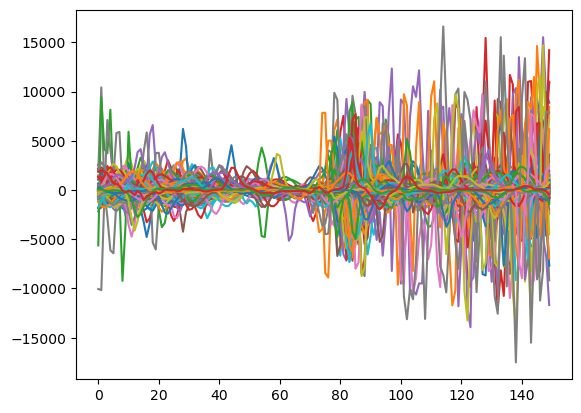

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

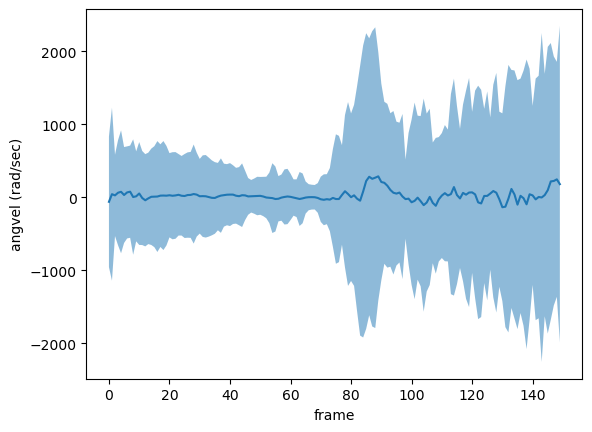

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

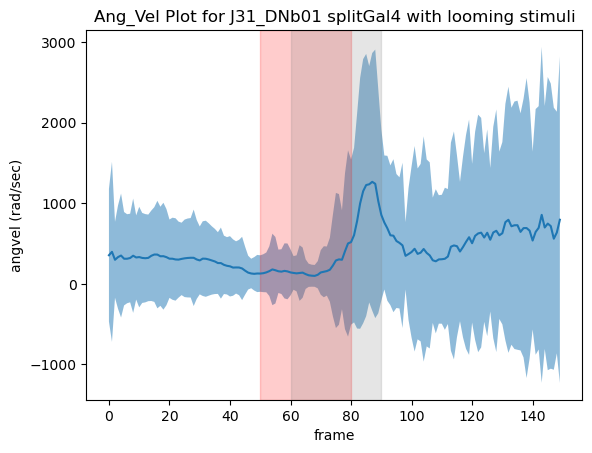

In [8]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.axvspan(60, 90, color='grey', alpha=0.2)
ax.set_title("Ang_Vel Plot for J31_DNb01 splitGal4 with looming stimuli")
plt.show()

In [9]:
data1 = extract_stimulus_centered_data(df,csvs["stim"])

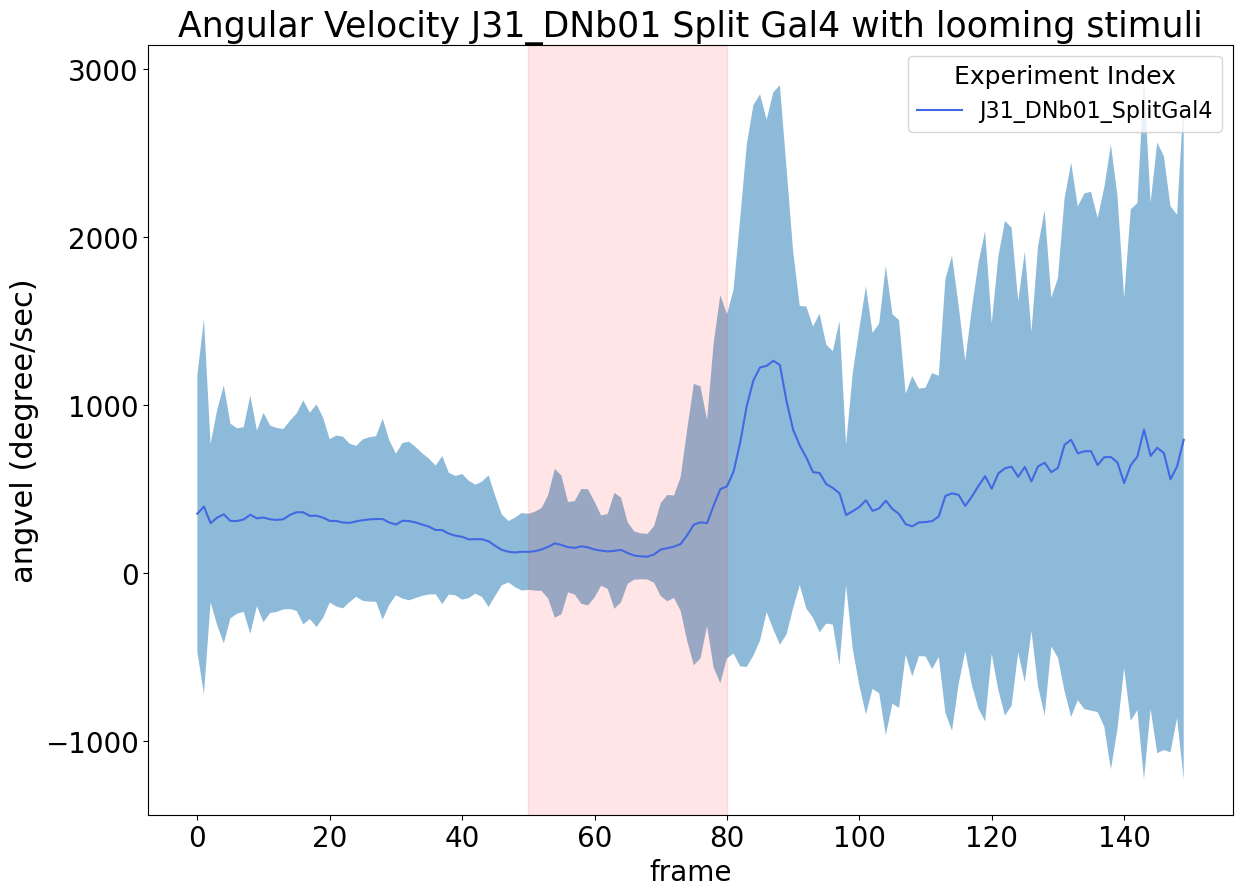

In [10]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax, label='J31_DNb01_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J31_DNb01 Split Gal4 with looming stimuli", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)


In [23]:
timestamp_column = csvs["opto"]["timestamp"]
print(timestamp_column)

0      1.734099e+09
1      1.734099e+09
2      1.734099e+09
3      1.734099e+09
4      1.734100e+09
           ...     
282    1.734170e+09
283    1.734170e+09
284    1.734171e+09
285    1.734181e+09
286    1.734181e+09
Name: timestamp, Length: 287, dtype: float64


In [24]:
timestamp_column.to_csv(r"C:\\Users\\pandey\\Desktop\\FlyFlightBehavior\\timestampL_output.csv", index=False)

In [11]:
import numpy as np
position_array = np.array(data['position'])
print("Numpy array shape:", position_array.shape)


Numpy array shape: (264, 150, 3)


In [12]:
import numpy as np

# Convert data['position'] to a NumPy array if it's still a list
position_array = np.array(data['position'])

# Now you can slice the data
pre_stimulus = position_array[:, 0:50, :]  # Frames 0 to 49
stimulus = position_array[:, 50:80, :]    # Frames 50 to 79
post_stimulus = position_array[:, 80:150, :]  # Frames 80 to 149

# Print shapes for verification
print("Pre-stimulus shape:", pre_stimulus.shape)
print("Stimulus shape:", stimulus.shape)
print("Post-stimulus shape:", post_stimulus.shape)

Pre-stimulus shape: (264, 50, 3)
Stimulus shape: (264, 30, 3)
Post-stimulus shape: (264, 70, 3)


In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# Extract ranges for all recordings
pre_stimulus = position_array[:, 0:50, :]
stimulus = position_array[:, 50:80, :]
post_stimulus = position_array[:, 80:150, :]

# Flatten the data for easy plotting
pre_stimulus_flat = pre_stimulus.reshape(-1, 3)  # (146*50, 3)
stimulus_flat = stimulus.reshape(-1, 3)          # (146*30, 3)
post_stimulus_flat = post_stimulus.reshape(-1, 3)  # (146*70, 3)

# Extract X, Y, Z values
x_pre, y_pre, z_pre = pre_stimulus_flat[:, 0], pre_stimulus_flat[:, 1], pre_stimulus_flat[:, 2]
x_stim, y_stim, z_stim = stimulus_flat[:, 0], stimulus_flat[:, 1], stimulus_flat[:, 2]
x_post, y_post, z_post = post_stimulus_flat[:, 0], post_stimulus_flat[:, 1], post_stimulus_flat[:, 2]


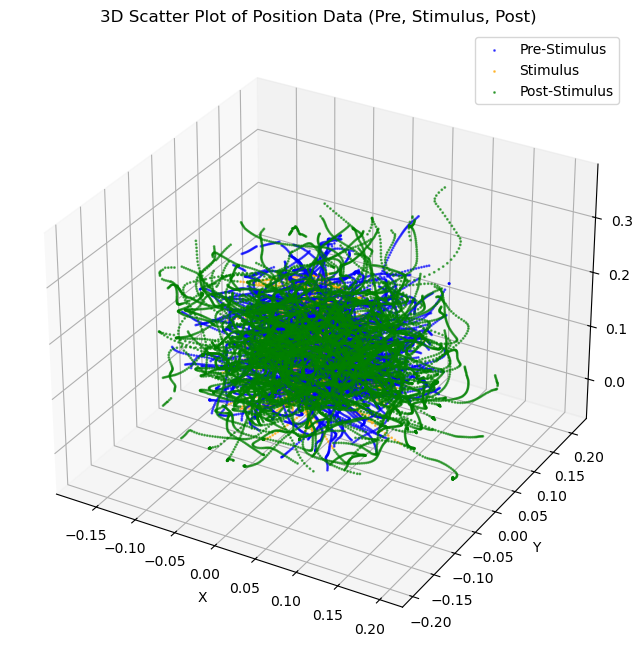

In [15]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each range with different colors
ax.scatter(x_pre, y_pre, z_pre, c='blue', label='Pre-Stimulus', alpha=0.6, s=1)
ax.scatter(x_stim, y_stim, z_stim, c='orange', label='Stimulus', alpha=0.6, s=1)
ax.scatter(x_post, y_post, z_post, c='green', label='Post-Stimulus', alpha=0.6, s=1)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Position Data (Pre, Stimulus, Post)')

# Add legend
ax.legend()

# Show the plot
plt.show()


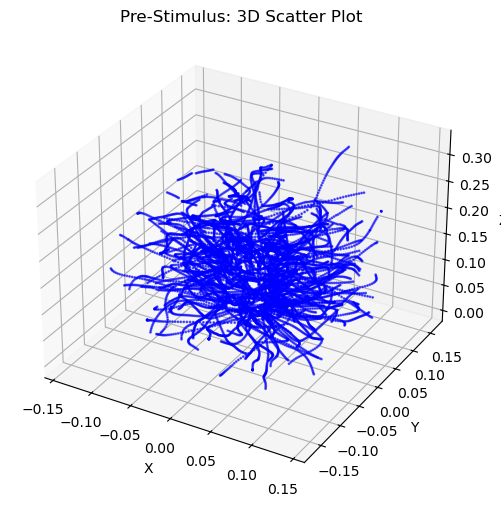

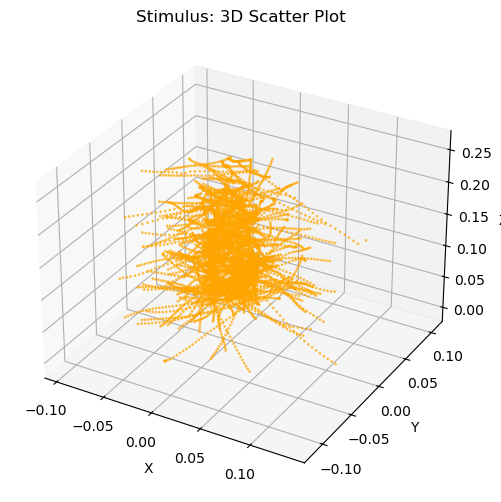

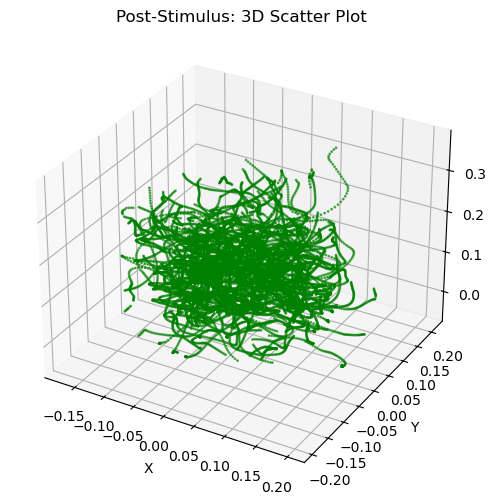

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a separate 3D scatter plot for each range

# Pre-stimulus Plot
fig_pre = plt.figure(figsize=(8, 6))
ax_pre = fig_pre.add_subplot(111, projection='3d')
ax_pre.scatter(x_pre, y_pre, z_pre, c='blue', alpha=0.6, s=1)
ax_pre.set_xlabel('X')
ax_pre.set_ylabel('Y')
ax_pre.set_zlabel('Z')
ax_pre.set_title('Pre-Stimulus: 3D Scatter Plot')
plt.show()

# Stimulus Plot
fig_stim = plt.figure(figsize=(8, 6))
ax_stim = fig_stim.add_subplot(111, projection='3d')
ax_stim.scatter(x_stim, y_stim, z_stim, c='orange', alpha=0.6, s=1)
ax_stim.set_xlabel('X')
ax_stim.set_ylabel('Y')
ax_stim.set_zlabel('Z')
ax_stim.set_title('Stimulus: 3D Scatter Plot')
plt.show()

# Post-stimulus Plot
fig_post = plt.figure(figsize=(8, 6))
ax_post = fig_post.add_subplot(111, projection='3d')
ax_post.scatter(x_post, y_post, z_post, c='green', alpha=0.6, s=1)
ax_post.set_xlabel('X')
ax_post.set_ylabel('Y')
ax_post.set_zlabel('Z')
ax_post.set_title('Post-Stimulus: 3D Scatter Plot')
plt.show()

In [17]:
# Centroid (Mean Position) for each range
centroid_pre = np.mean(pre_stimulus_flat, axis=0)  # Mean of x, y, z
centroid_stim = np.mean(stimulus_flat, axis=0)
centroid_post = np.mean(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Centroid (X, Y, Z): {centroid_pre}")
print(f"Stimulus Centroid (X, Y, Z): {centroid_stim}")
print(f"Post-Stimulus Centroid (X, Y, Z): {centroid_post}")


Pre-Stimulus Centroid (X, Y, Z): [0.00815763 0.00319633 0.13192937]
Stimulus Centroid (X, Y, Z): [-0.00079176  0.00202996  0.11888484]
Post-Stimulus Centroid (X, Y, Z): [0.00450521 0.00467403 0.11765565]


In [18]:
# Standard deviation for each range
std_pre = np.std(pre_stimulus_flat, axis=0)
std_stim = np.std(stimulus_flat, axis=0)
std_post = np.std(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Standard Deviation (X, Y, Z): {std_pre}")
print(f"Stimulus Standard Deviation (X, Y, Z): {std_stim}")
print(f"Post-Stimulus Standard Deviation (X, Y, Z): {std_post}")


Pre-Stimulus Standard Deviation (X, Y, Z): [0.0527507  0.05152476 0.0605132 ]
Stimulus Standard Deviation (X, Y, Z): [0.02720776 0.02579613 0.05495994]
Post-Stimulus Standard Deviation (X, Y, Z): [0.07120711 0.06729262 0.07124786]


In [19]:
# Maximum distance from centroid
def max_distance_from_centroid(data, centroid):
    distances = np.linalg.norm(data - centroid, axis=1)  # Euclidean distance
    return np.max(distances)

max_dist_pre = max_distance_from_centroid(pre_stimulus_flat, centroid_pre)
max_dist_stim = max_distance_from_centroid(stimulus_flat, centroid_stim)
max_dist_post = max_distance_from_centroid(post_stimulus_flat, centroid_post)

print(f"Pre-Stimulus Maximum Distance from Centroid: {max_dist_pre}")
print(f"Stimulus Maximum Distance from Centroid: {max_dist_stim}")
print(f"Post-Stimulus Maximum Distance from Centroid: {max_dist_post}")

Pre-Stimulus Maximum Distance from Centroid: 0.22800455466199562
Stimulus Maximum Distance from Centroid: 0.16029176319998592
Post-Stimulus Maximum Distance from Centroid: 0.29842495097149624


In [20]:
# Path length for each range
def path_length(data):
    distances = np.linalg.norm(np.diff(data, axis=0), axis=1)  # Summing the distances between consecutive points
    return np.sum(distances)

path_pre = path_length(pre_stimulus_flat)
path_stim = path_length(stimulus_flat)
path_post = path_length(post_stimulus_flat)

print(f"Pre-Stimulus Path Length: {path_pre}")
print(f"Stimulus Path Length: {path_stim}")
print(f"Post-Stimulus Path Length: {path_post}")

Pre-Stimulus Path Length: 66.18434868595331
Stimulus Path Length: 46.70488454943407
Post-Stimulus Path Length: 93.11111912114137


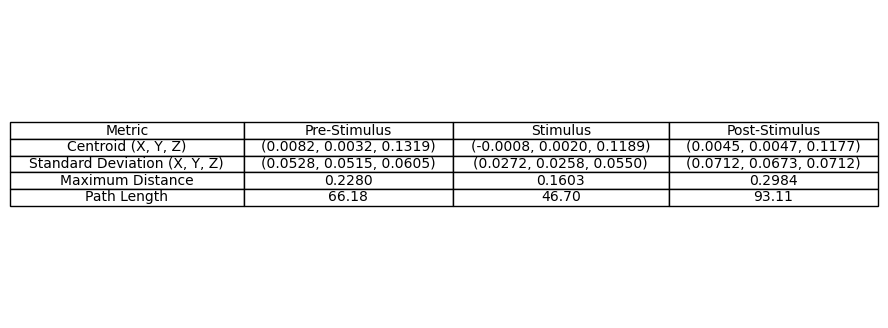

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    "Metric": [
        "Centroid (X, Y, Z)",
        "Standard Deviation (X, Y, Z)",
        "Maximum Distance",
        "Path Length"
    ],
    "Pre-Stimulus": [
        "(0.0082, 0.0032, 0.1319)",
        "(0.0528, 0.0515, 0.0605)",
        "0.2280",
        "66.18"
    ],
    "Stimulus": [
        "(-0.0008, 0.0020, 0.1189)",
        "(0.0272, 0.0258, 0.0550)",
        "0.1603",
        "46.70"
    ],
    "Post-Stimulus": [
        "(0.0045, 0.0047, 0.1177)",
        "(0.0712, 0.0673, 0.0712)",
        "0.2984",
        "93.11"
    ]
}

# Convert the data into a Pandas DataFrame for better handling
df = pd.DataFrame(data)

# Plot the table using Matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Show the table
plt.show()


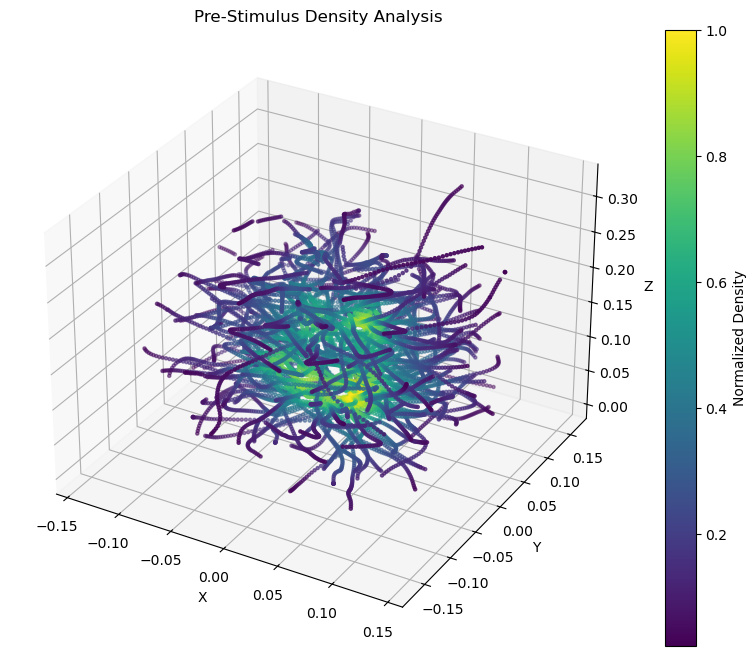

Pre-Stimulus Density Analysis:
  Mean Density: 0.3649
  Max Density: 1.0000
  Min Density: 0.0217



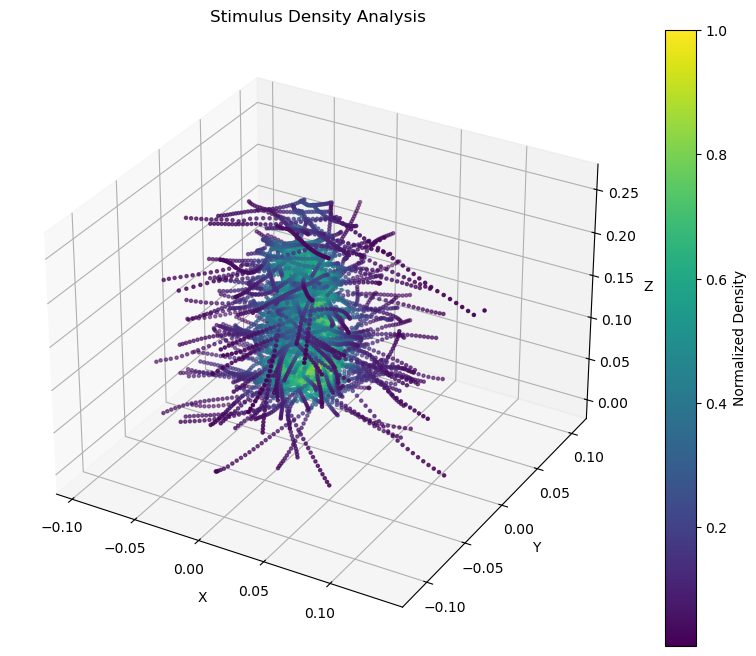

Stimulus Density Analysis:
  Mean Density: 0.3463
  Max Density: 1.0000
  Min Density: 0.0094



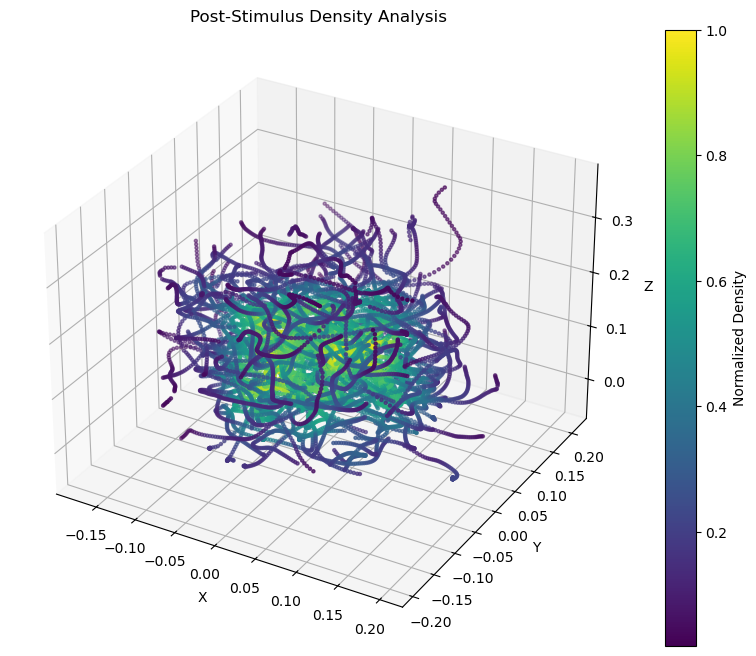

Post-Stimulus Density Analysis:
  Mean Density: 0.4591
  Max Density: 1.0000
  Min Density: 0.0178



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Data: Pre-Stimulus, Stimulus, Post-Stimulus (flattened)
data_ranges = {
    "Pre-Stimulus": pre_stimulus_flat,
    "Stimulus": stimulus_flat,
    "Post-Stimulus": post_stimulus_flat
}

# Density Analysis and Visualization
for phase, data in data_ranges.items():
    x, y, z = data[:, 0], data[:, 1], data[:, 2]

    # Kernel Density Estimate (KDE)
    xyz = np.vstack([x, y, z])
    kde = gaussian_kde(xyz)  # Fit KDE
    density = kde(xyz)       # Evaluate density at each point

    # Normalize density for better interpretability
    density /= density.max()

    # Sort by density for visualization (optional)
    idx = density.argsort()
    x, y, z, density = x[idx], y[idx], z[idx], density[idx]

    # Plot 3D scatter with density coloring
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=density, cmap='viridis', s=5)
    plt.colorbar(scatter, label='Normalized Density')
    ax.set_title(f"{phase} Density Analysis")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

    # Print summary metrics
    print(f"{phase} Density Analysis:")
    print(f"  Mean Density: {np.mean(density):.4f}")
    print(f"  Max Density: {np.max(density):.4f}")
    print(f"  Min Density: {np.min(density):.4f}\n")
